# Introduction

### Objectives of the project

Data Preparation
Data Visualization
Data Description and Data cleaning
Testing Hypothesis 
Building a model using linear regression

#### Introduction to the Dataset 

Apple Inc. is an American multinational technology company that specializes in consumer electronics, computer software, and online services. Apple is the world's largest technology company by revenue and, since January 2021, the world's most valuable company.

Dataset of stock prices at different time intervals(2015 - 2020) of Apple USA.

symbol - Apple Stock
close - Closing price
high - Highest price of the day
low - Lowest Price of the day
open - Opening price of the day
volume - Volume of stock traded
adjClose - Closing stock price in relation to other stock attributes/actions
adjHigh - Highest stock price in relation to other stock attributes/actions
adjOpen - Opening Stock price in relation to other stock attributes/actions
adjVolume - Trading volume in relation to other stock attributes/actions
divCash - Cash dividend
splitFactor - Stock split

We will build a Linear regression model for AAPL stock prices from 2015-2020 dataset. The dataset consists of 'symbol', 'date','high', 'low','open', 'volume','adjClose', 'adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'divCash','splitFactor', which are independent and 'close' as a dependent feature. We will predict individual closing price.


## Import libraries

In [1]:
from sklearn.linear_model import LinearRegression 
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
# pandas and numpy are used for data manipulation 
import pandas as pd 
import numpy as np 
import math
# matplotlib and seaborn are used for plotting graphs 
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime
from statsmodels.regression import linear_model

## Import dataset and read data

In [2]:
Df = pd.read_csv (r'C:\Users\Srividya\Desktop\archive\AAPL.csv') 
print (Df)

      Unnamed: 0 symbol                       date    close     high  \
0              0   AAPL  2015-05-27 00:00:00+00:00  132.045  132.260   
1              1   AAPL  2015-05-28 00:00:00+00:00  131.780  131.950   
2              2   AAPL  2015-05-29 00:00:00+00:00  130.280  131.450   
3              3   AAPL  2015-06-01 00:00:00+00:00  130.535  131.390   
4              4   AAPL  2015-06-02 00:00:00+00:00  129.960  130.655   
...          ...    ...                        ...      ...      ...   
1253        1253   AAPL  2020-05-18 00:00:00+00:00  314.960  316.500   
1254        1254   AAPL  2020-05-19 00:00:00+00:00  313.140  318.520   
1255        1255   AAPL  2020-05-20 00:00:00+00:00  319.230  319.520   
1256        1256   AAPL  2020-05-21 00:00:00+00:00  316.850  320.890   
1257        1257   AAPL  2020-05-22 00:00:00+00:00  318.890  319.230   

           low    open    volume    adjClose     adjHigh      adjLow  \
0     130.0500  130.34  45833246  121.682558  121.880685  119.8

In [3]:
#print shape of the dataset with rows and columns with information
print ("The shape of the  data is (row, column):"+ str(Df.shape))
print (Df.info())

The shape of the  data is (row, column):(1258, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1258 non-null   int64  
 1   symbol       1258 non-null   object 
 2   date         1258 non-null   object 
 3   close        1258 non-null   float64
 4   high         1258 non-null   float64
 5   low          1258 non-null   float64
 6   open         1258 non-null   float64
 7   volume       1258 non-null   int64  
 8   adjClose     1258 non-null   float64
 9   adjHigh      1258 non-null   float64
 10  adjLow       1258 non-null   float64
 11  adjOpen      1258 non-null   float64
 12  adjVolume    1258 non-null   int64  
 13  divCash      1258 non-null   float64
 14  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(3), object(2)
memory usage: 147.5+ KB
None


In [4]:
Df.head(10) #Displaying first 10 lines of the data set

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0
5,5,AAPL,2015-06-03 00:00:00+00:00,130.120,130.940,129.90,130.66,30983542,119.908625,120.664274,119.705890,120.406248,30983542,0.0,1.0
6,6,AAPL,2015-06-04 00:00:00+00:00,129.360,130.580,128.91,129.58,38450118,119.208267,120.332526,118.793582,119.411002,38450118,0.0,1.0
7,7,AAPL,2015-06-05 00:00:00+00:00,128.650,129.690,128.36,129.50,35626800,118.553986,119.512370,118.286744,119.337280,35626800,0.0,1.0
8,8,AAPL,2015-06-08 00:00:00+00:00,127.800,129.210,126.83,128.90,52674786,117.770691,119.070039,116.876813,118.784366,52674786,0.0,1.0
9,9,AAPL,2015-06-09 00:00:00+00:00,127.420,128.080,125.62,126.70,56075420,117.420512,118.028717,115.761770,116.757015,56075420,0.0,1.0


In [5]:
#Deduce datatypes
Df.dtypes

Unnamed: 0       int64
symbol          object
date            object
close          float64
high           float64
low            float64
open           float64
volume           int64
adjClose       float64
adjHigh        float64
adjLow         float64
adjOpen        float64
adjVolume        int64
divCash        float64
splitFactor    float64
dtype: object

In [6]:
Df.describe()

,Unnamed: 0,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.0
mean,628.500000,167.723998,169.230475,166.039780,167.548266,3.500397e+07,162.666715,164.131054,161.028013,162.493082,3.500397e+07,0.010477,1.0
std,363.297628,56.850796,57.500128,56.006773,56.612707,1.729100e+07,58.733820,59.402842,57.869246,58.494560,1.729100e+07,0.083366,0.0
min,0.000000,90.340000,91.670000,89.470000,90.000000,1.136204e+07,84.954351,86.205062,84.136216,84.634620,1.136204e+07,0.000000,1.0
25%,314.250000,116.327500,117.405000,115.602500,116.482500,2.359205e+07,109.484490,110.393556,107.962457,109.135002,2.359205e+07,0.000000,1.0
50%,628.500000,160.485000,162.080000,158.974250,160.345000,3.064771e+07,154.710645,156.091874,153.054341,154.410017,3.064771e+07,0.000000,1.0
75%,942.750000,199.785000,201.277500,198.170000,199.520000,4.100487e+07,196.960053,198.428438,195.281553,196.452903,4.100487e+07,0.000000,1.0
max,1257.000000,327.200000,327.850000,323.350000,324.730000,1.622063e+08,326.337147,326.357095,322.497300,323.873661,1.622063e+08,0.820000,1.0


## Data Preparation
In order for our model to perform well, we need to cleanse our data. In our case, we don't have much garbage to clean except few null values. Also let's also extract few more features from the time to perform indepth EDA.

In [7]:
Df['date']= pd.to_datetime(Df['date']).dt.date
print(Df)

      Unnamed: 0 symbol        date    close     high       low    open  \
0              0   AAPL  2015-05-27  132.045  132.260  130.0500  130.34   
1              1   AAPL  2015-05-28  131.780  131.950  131.1000  131.86   
2              2   AAPL  2015-05-29  130.280  131.450  129.9000  131.23   
3              3   AAPL  2015-06-01  130.535  131.390  130.0500  131.20   
4              4   AAPL  2015-06-02  129.960  130.655  129.3200  129.86   
...          ...    ...         ...      ...      ...       ...     ...   
1253        1253   AAPL  2020-05-18  314.960  316.500  310.3241  313.17   
1254        1254   AAPL  2020-05-19  313.140  318.520  313.0100  315.03   
1255        1255   AAPL  2020-05-20  319.230  319.520  316.2000  316.68   
1256        1256   AAPL  2020-05-21  316.850  320.890  315.8700  318.66   
1257        1257   AAPL  2020-05-22  318.890  319.230  315.3500  315.77   

        volume    adjClose     adjHigh      adjLow     adjOpen  adjVolume  \
0     45833246  121.68

In [8]:
print(type(Df['date']))

<class 'pandas.core.series.Series'>


In [9]:
#Setting date column as index
Df.set_index("date", drop=False, inplace=True)
Df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,,,,
2015-05-27,0,AAPL,2015-05-27,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
2015-05-28,1,AAPL,2015-05-28,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2015-05-29,2,AAPL,2015-05-29,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
2015-06-01,3,AAPL,2015-06-01,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
2015-06-02,4,AAPL,2015-06-02,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [10]:
#Imputing null values with mean 
Df.fillna(Df.mean(),inplace=True)

#Checking for null values
Df.isnull().sum()

C:\Users\Srividya\AppData\Local\Temp/ipykernel_9552/1306049371.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Df.fillna(Df.mean(),inplace=True)


Unnamed: 0     0
symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [11]:
#Drop some columns which are not neccesary at this point
Df.drop(['adjClose', 'adjHigh', 'adjLow', 'adjVolume', 'adjOpen', 'divCash', 'splitFactor'], axis= 1, inplace= True)
Df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume
date,,,,,,,,
2015-05-27,0,AAPL,2015-05-27,132.045,132.260,130.05,130.34,45833246
2015-05-28,1,AAPL,2015-05-28,131.780,131.950,131.10,131.86,30733309
2015-05-29,2,AAPL,2015-05-29,130.280,131.450,129.90,131.23,50884452
2015-06-01,3,AAPL,2015-06-01,130.535,131.390,130.05,131.20,32112797
2015-06-02,4,AAPL,2015-06-02,129.960,130.655,129.32,129.86,33667627


In [12]:
print(len(Df))

1258


## Data Visualization
In this phase, we will witness a lot of line graphs 

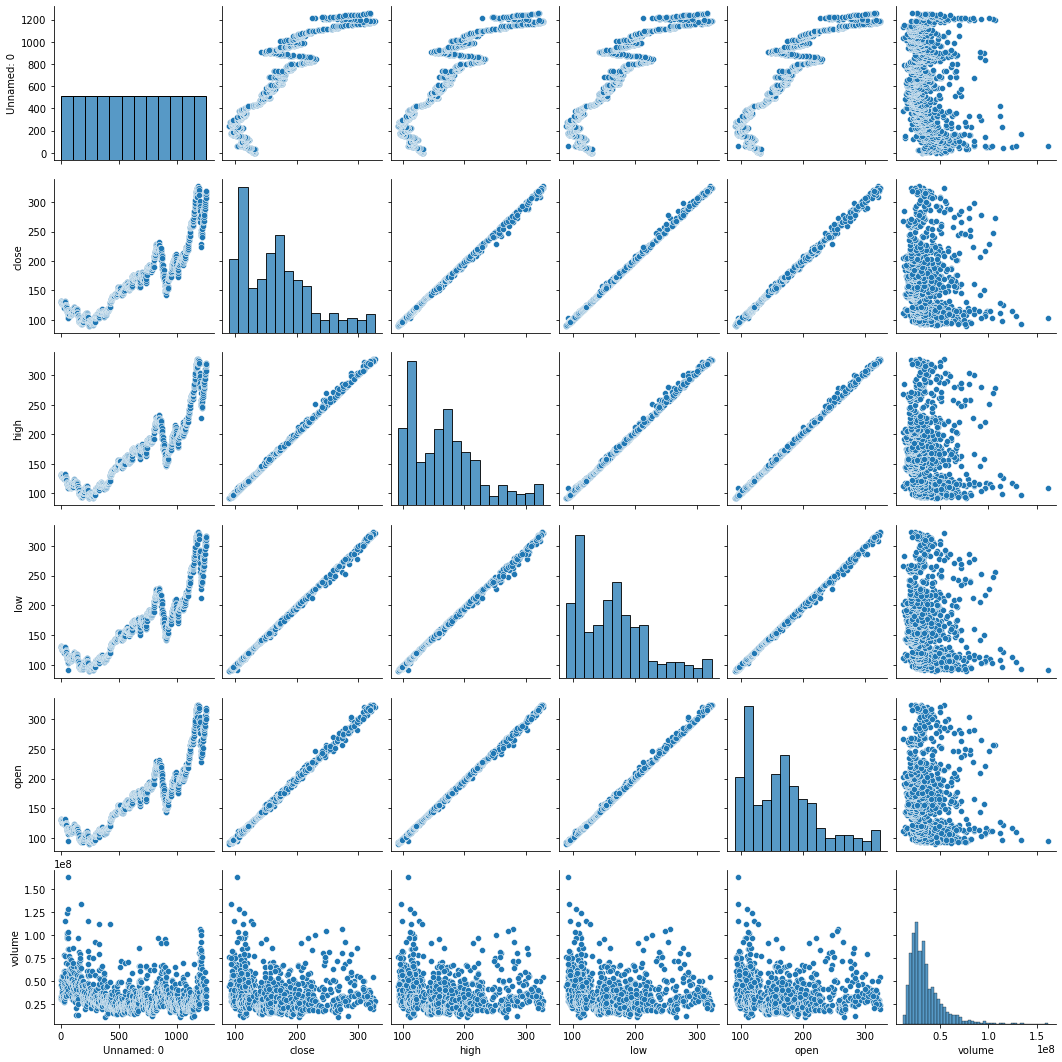

In [13]:
# Use pairplot from seaborn
sns.pairplot(Df)
plt.savefig('Df.png')
plt.show()

From this pairplot it can be seen that the plots of high, low, open, close tend to show similar variations.

In [14]:
print(Df[['date','close']])


                  date    close
date                           
2015-05-27  2015-05-27  132.045
2015-05-28  2015-05-28  131.780
2015-05-29  2015-05-29  130.280
2015-06-01  2015-06-01  130.535
2015-06-02  2015-06-02  129.960
...                ...      ...
2020-05-18  2020-05-18  314.960
2020-05-19  2020-05-19  313.140
2020-05-20  2020-05-20  319.230
2020-05-21  2020-05-21  316.850
2020-05-22  2020-05-22  318.890

[1258 rows x 2 columns]


Text(0, 0.5, 'closing price in $')

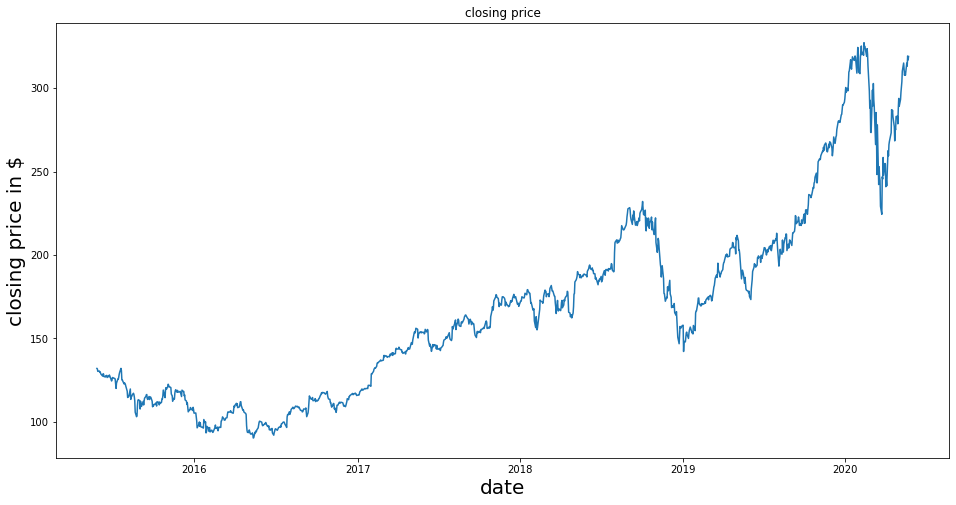

In [15]:
#Univariate Analysis
#As close, high, low, open prices are almost simlar but slightly vary
#here we choose one of them to check whether the prices are increaing or decreasing over the years.
#Let's see the trend of single factor over time.lets consider closing price v/s date and plot the graph
plt.figure(figsize=(16,8))
plt.title('closing price')
plt.plot(Df['close'])
plt.xlabel('date', fontsize=20)
plt.ylabel('closing price in $', fontsize=20)

#### Insights:

There has been a drastic increase in the closing price over years
There were two spikes at the end of 2018 and 2020

# Simple Linear Regression

The equation of a simple straight line: 𝑦=𝑚𝑥+𝑏, where 𝑚 is
slope and 𝑏 is intercept

Multiple linear model
𝑦(𝒘,𝒙) = 𝑤0+𝑤1𝑥1+⋯+𝑤𝑝𝑥𝑝
with
𝒘=𝑤0,…,𝑤𝑝,

where

𝑦  the target variable, close(closing price)

𝑥  is the explanatory variable, {𝑥1,𝑥2,𝑥3,𝑥4}= {'high','open','low','volume'}
wp=regression coefficient that measures a unit change in the dependent variable when xp changes 

𝑤0  is the intercept, these are the parameters we want to estimate.

# Train-test split and model selection

In this section we will do a data split to simulate an unknown data set to report the performance of our model.

In [16]:
#From the pairplot above it can be seen that the plots of high, low, open, close prices tend to show similar variations.
#so here we will build a model which will compare actual closing price and predicted closing price based on Highest price,
#Lowest Price, Opening price of the day
x= Df[['high','open','low', 'volume']]
y= Df['close']

In [17]:
x_train, x_test, y_train, y_test= train_test_split(x,y, random_state=0)

In [18]:
x_train

,high,open,low,volume
date,,,,
2019-04-01,191.68,191.64,188.3800,27861964
2017-08-28,162.00,160.14,159.9300,25279674
2017-10-12,157.37,156.35,155.7299,16045720
2019-10-22,242.20,241.16,239.6218,22684001
2018-05-07,187.67,185.18,184.7500,42451423
...,...,...,...,...
2018-06-06,194.08,193.63,191.9200,20933619
2018-09-18,221.85,217.79,217.1200,31571712
2020-03-25,258.25,250.75,244.3000,75900510


In [19]:
y_train

date
2019-04-01    191.24
2017-08-28    161.47
2017-10-12    156.00
2019-10-22    239.96
2018-05-07    185.16
               ...  
2018-06-06    193.98
2018-09-18    218.24
2020-03-25    245.52
2017-08-14    159.85
2018-02-12    162.71
Name: close, Length: 943, dtype: float64

In [20]:
x_train.shape

(943, 4)

In [21]:
x_test.shape

(315, 4)

In [22]:
y_train.shape

(943,)

In [23]:
y_test.shape

(315,)

In [24]:
LRegressor = LinearRegression().fit(x_train,y_train)

In [25]:
LRegressor.fit(x_train,y_train)

LinearRegression()

In [26]:
print(LRegressor.coef_)

[ 6.87109453e-01 -5.72199532e-01  8.86463282e-01 -1.08492816e-09]


In [27]:
print(LRegressor.intercept_)

0.1109482537584654


In [28]:
predicted= LRegressor.predict(x_test)

In [29]:
print(x_test)

               high     open       low    volume
date                                            
2015-06-03  130.940  130.660  129.9000  30983542
2017-05-11  154.070  152.450  152.3100  25596687
2015-08-10  119.990  116.530  116.5300  54951597
2019-04-25  207.760  206.830  205.1200  18543206
2016-02-22   96.900   96.310   95.9200  34280758
...             ...      ...       ...       ...
2018-05-09  187.400  186.550  185.2200  23211241
2019-05-20  184.349  183.520  180.2839  38612290
2019-01-24  154.480  154.110  151.7400  25441549
2017-03-22  141.600  139.845  139.7600  25860165
2019-01-08  151.820  149.560  148.5200  41025314

[315 rows x 4 columns]


In [30]:
dframe= pd.DataFrame(y_test, predicted)

In [31]:
dfr= pd.DataFrame({'Actual closing price': y_test, 'Predicted closing price': predicted})
print(dfr)

            Actual closing price  Predicted closing price
date                                                     
2015-06-03                130.12               130.435435
2017-05-11                153.95               153.731535
2015-08-10                119.72               119.118748
2019-04-25                205.28               206.328009
2016-02-22                 96.88                96.575683
...                          ...                      ...
2018-05-09                187.36               186.296984
2019-05-20                183.09               181.541997
2019-01-24                152.70               152.558283
2017-03-22                141.42               141.250455
2019-01-08                150.75               150.462761

[315 rows x 2 columns]


In [32]:
LRegressor.score(x_test,y_test)

0.9993380579133726

In [33]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predicted))

Mean Absolute Error: 0.7613702359771571


In [34]:
print('Mean Squared Error:',metrics.mean_squared_error(y_test,predicted))

Mean Squared Error: 1.976697061592889


In [35]:
print('Root Mean Squared Error:',math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Root Mean Squared Error: 1.405950590025442


In [36]:
graph=dfr.head(10)

<AxesSubplot:xlabel='date'>

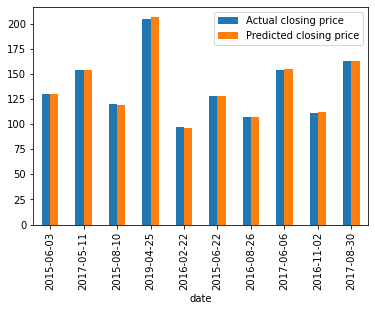

In [37]:
graph.plot(kind='bar')

## Hypothesis Testing:
We have calculated T test statistics separately for all 4 independent features to check the relationship between each independent parameter and dependent parameter. We have used function "pvalues" from statsmodels.regression which gives two-tailed p values for the t-stats of the params.


Null hypothesis (H0): There is no direct relationship between **high price** and **closed price**. Slope (w1) = 0 </br>
Alternative hypothesis (H1): slope is not equal to zero.

The above hypotheis will be repeated for all 4 input features.

alpha (significance level): It is set to 5% i.e. 0.05 
So, if p value turns out to be greater than alpha, then we accept null hypothesis. Else, we reject it.

In [39]:
model = linear_model.OLS(y_train, x_train)
results = model.fit()
#print(results.params) 
print(results.pvalues) #pvalues bydefault considers null hypotheis as 0.

high      4.767100e-143
open       1.150956e-68
low       2.973005e-168
volume     8.850921e-01
dtype: float64


## Analysis:
1. P value of high is 4.767100e-143 < 0.05.
2. P value of open is 1.150956e-68 < 0.05.
3. P value of low is 2.973005e-168 < 0.05.

4. P value of volume is 8.850921e-01 > 0.05.

From above results, it is clear that p values of high, low and open are very less than alpha. Hence, we reject null hypothesis. And, these 3 features are good estimators.

However, p value of volume is more than alpha. Hence, we accept null hypothesis. So, we can also say that volume is not a good estimator and metrics will not change even if we make slope (w4) parameter of volume as 0.